# Project - Car origin prediction using Logistic Regression

#### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Cars93.csv")
df.head(20)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
5,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,Front,...,6,189,105,69,41,28.0,16.0,2880,USA,Buick Century
6,Buick,LeSabre,Large,19.9,20.8,21.7,19,28,Driver only,Front,...,6,200,111,74,42,30.5,17.0,3470,USA,Buick LeSabre
7,Buick,Roadmaster,Large,22.6,23.7,24.9,16,25,Driver only,Rear,...,6,216,116,78,45,30.5,21.0,4105,USA,Buick Roadmaster
8,Buick,Riviera,Midsize,26.3,26.3,26.3,19,27,Driver only,Front,...,5,198,108,73,41,26.5,14.0,3495,USA,Buick Riviera
9,Cadillac,DeVille,Large,33.0,34.7,36.3,16,25,Driver only,Front,...,6,206,114,73,43,35.0,18.0,3620,USA,Cadillac DeVille


In [3]:
df.columns=['Manufacturer', 'model', 'Type', 'MinPrice', 'Price',
       'MaxPrice', 'MPGcity', 'MPGhighway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Revpermile',
       'Mantransavail', 'Fueltankcapacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turncircle', 'Rearseatroom', 'Luggageroom',
       'Weight', 'Origin', 'Make']

In [4]:
df.shape

(93, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      93 non-null     object 
 1   model             93 non-null     object 
 2   Type              93 non-null     object 
 3   MinPrice          93 non-null     float64
 4   Price             93 non-null     float64
 5   MaxPrice          93 non-null     float64
 6   MPGcity           93 non-null     int64  
 7   MPGhighway        93 non-null     int64  
 8   AirBags           59 non-null     object 
 9   DriveTrain        93 non-null     object 
 10  Cylinders         93 non-null     object 
 11  EngineSize        93 non-null     float64
 12  Horsepower        93 non-null     int64  
 13  RPM               93 non-null     int64  
 14  Revpermile        93 non-null     int64  
 15  Mantransavail     93 non-null     object 
 16  Fueltankcapacity  93 non-null     float64
 17 

In [6]:
df.describe()

,MinPrice,Price,MaxPrice,MPGcity,MPGhighway,EngineSize,Horsepower,RPM,Revpermile,Fueltankcapacity,Passengers,Length,Wheelbase,Width,Turncircle,Rearseatroom,Luggageroom,Weight
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,91.000000,82.000000,93.000000
mean,17.125806,19.509677,21.898925,22.365591,29.086022,2.667742,143.827957,5280.645161,2332.204301,16.664516,5.086022,183.204301,103.946237,69.376344,38.956989,27.829670,13.890244,3072.903226
std,8.746029,9.659430,11.030457,5.619812,5.331726,1.037363,52.374410,596.731690,496.506525,3.279370,1.038979,14.602382,6.819674,3.778986,3.223265,2.989072,2.997967,589.896510
min,6.700000,7.400000,7.900000,15.000000,20.000000,1.000000,55.000000,3800.000000,1320.000000,9.200000,2.000000,141.000000,90.000000,60.000000,32.000000,19.000000,6.000000,1695.000000
25%,10.800000,12.200000,14.700000,18.000000,26.000000,1.800000,103.000000,4800.000000,1985.000000,14.500000,4.000000,174.000000,98.000000,67.000000,37.000000,26.000000,12.000000,2620.000000
50%,14.700000,17.700000,19.600000,21.000000,28.000000,2.400000,140.000000,5200.000000,2340.000000,16.400000,5.000000,183.000000,103.000000,69.000000,39.000000,27.500000,14.000000,3040.000000
75%,20.300000,23.300000,25.300000,25.000000,31.000000,3.300000,170.000000,5750.000000,2565.000000,18.800000,6.000000,192.000000,110.000000,72.000000,41.000000,30.000000,15.000000,3525.000000
max,45.400000,61.900000,80.000000,46.000000,50.000000,5.700000,300.000000,6500.000000,3755.000000,27.000000,8.000000,219.000000,119.000000,78.000000,45.000000,36.000000,22.000000,4105.000000


## Dealing with missing data

In [7]:
W=pd.DataFrame(df.isna().sum(),columns=['ct'])
for i in W[W.ct > 0].index:
    if df[i].dtypes=='object':
        mode=df[i].mode()[0]
        df[i]=df[i].fillna(mode)
    else:
        mean=df[i].mean()
        df[i]=df[i].fillna(mean)
df.isnull().sum()

Manufacturer        0
model               0
Type                0
MinPrice            0
Price               0
MaxPrice            0
MPGcity             0
MPGhighway          0
AirBags             0
DriveTrain          0
Cylinders           0
EngineSize          0
Horsepower          0
RPM                 0
Revpermile          0
Mantransavail       0
Fueltankcapacity    0
Passengers          0
Length              0
Wheelbase           0
Width               0
Turncircle          0
Rearseatroom        0
Luggageroom         0
Weight              0
Origin              0
Make                0
dtype: int64

### Split data into X and Y

In [8]:
X=df.drop(labels=["Origin"],axis=1)
Y=df[["Origin"]]

In [9]:
X.head(20)

,Manufacturer,model,Type,MinPrice,Price,MaxPrice,MPGcity,MPGhighway,AirBags,DriveTrain,...,Fueltankcapacity,Passengers,Length,Wheelbase,Width,Turncircle,Rearseatroom,Luggageroom,Weight,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,Driver only,Front,...,13.2,5,177,102,68,37,26.50000,11.000000,2705,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.00000,15.000000,3560,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.00000,14.000000,3375,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,21.1,6,193,106,70,37,31.00000,17.000000,3405,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.00000,13.000000,3640,BMW 535i
5,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,Front,...,16.4,6,189,105,69,41,28.00000,16.000000,2880,Buick Century
6,Buick,LeSabre,Large,19.9,20.8,21.7,19,28,Driver only,Front,...,18.0,6,200,111,74,42,30.50000,17.000000,3470,Buick LeSabre
7,Buick,Roadmaster,Large,22.6,23.7,24.9,16,25,Driver only,Rear,...,23.0,6,216,116,78,45,30.50000,21.000000,4105,Buick Roadmaster
8,Buick,Riviera,Midsize,26.3,26.3,26.3,19,27,Driver only,Front,...,18.8,5,198,108,73,41,26.50000,14.000000,3495,Buick Riviera
9,Cadillac,DeVille,Large,33.0,34.7,36.3,16,25,Driver only,Front,...,18.0,6,206,114,73,43,35.00000,18.000000,3620,Cadillac DeVille


In [10]:
Y.head(20)

,Origin
0,non-USA
1,non-USA
2,non-USA
3,non-USA
4,non-USA
5,USA
6,USA
7,USA
8,USA
9,USA


In [11]:
X.shape

(93, 26)

In [12]:
Y.shape

(93, 1)

In [13]:
Y.groupby("Origin").size()

Origin
USA        48
non-USA    45
dtype: int64

## EDA

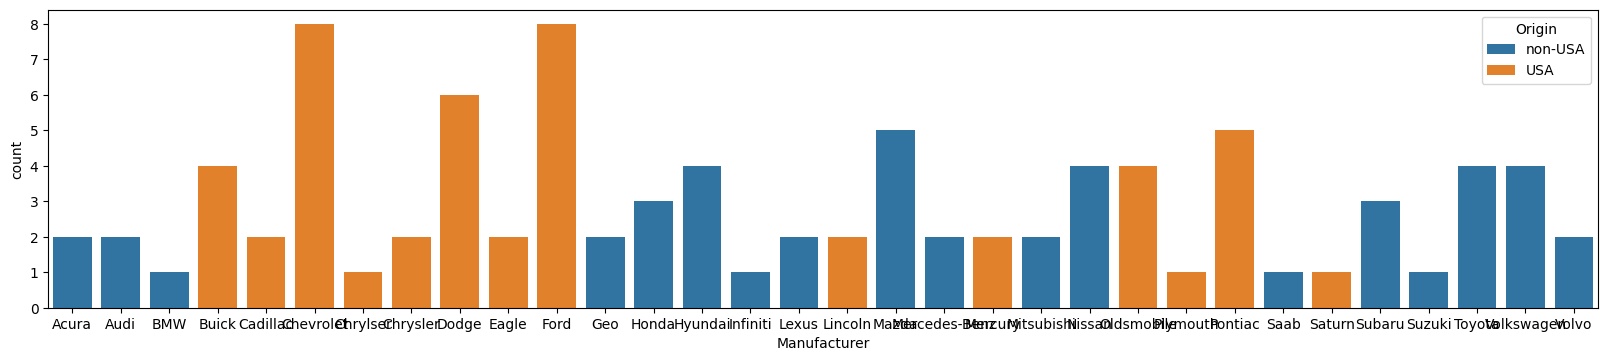

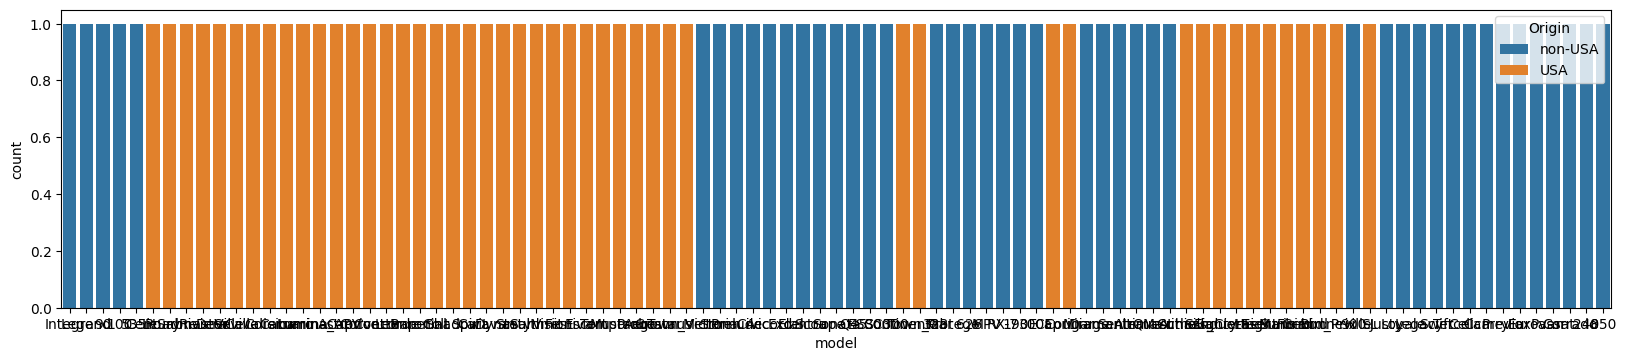

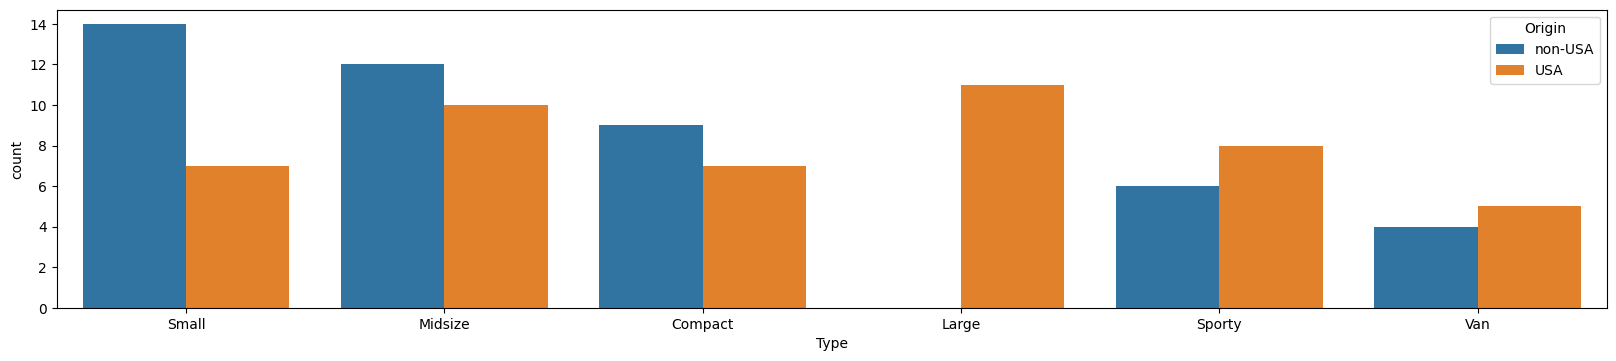

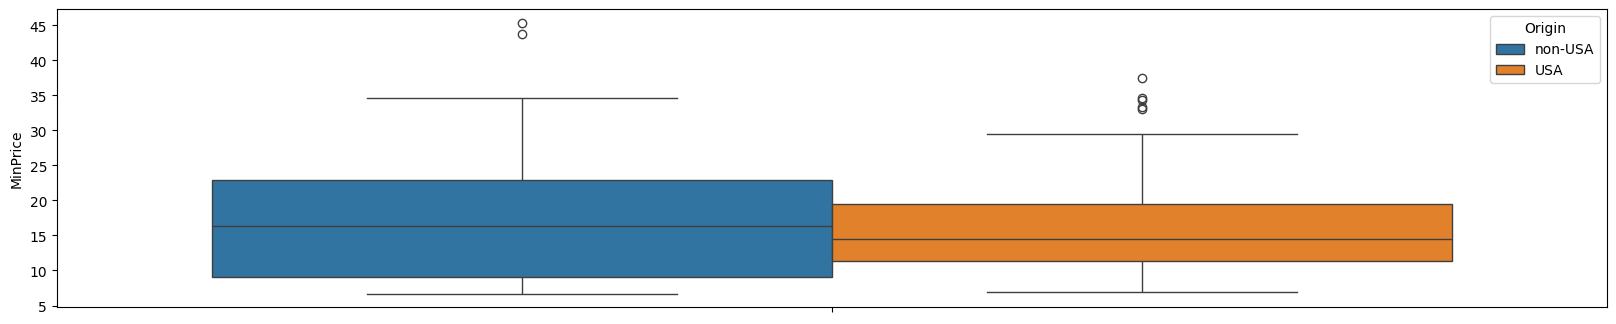

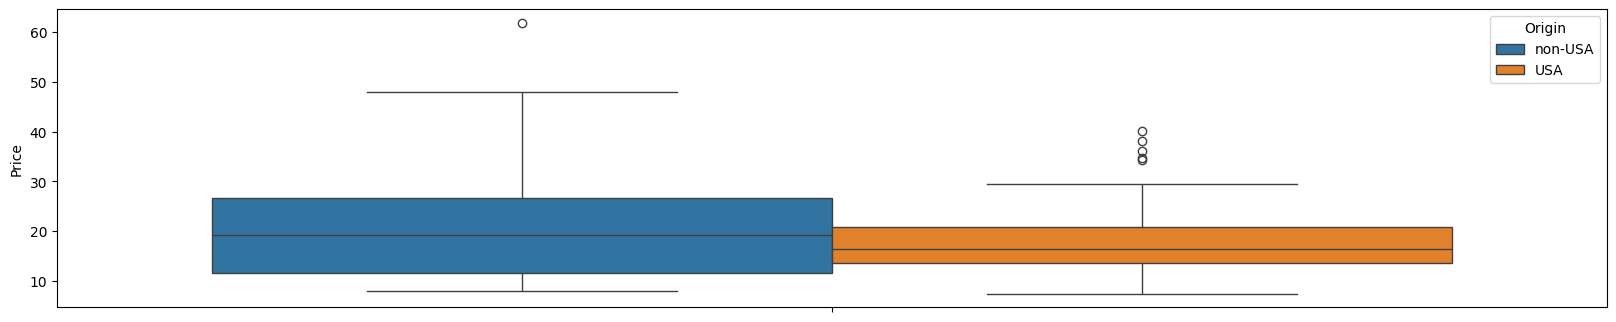

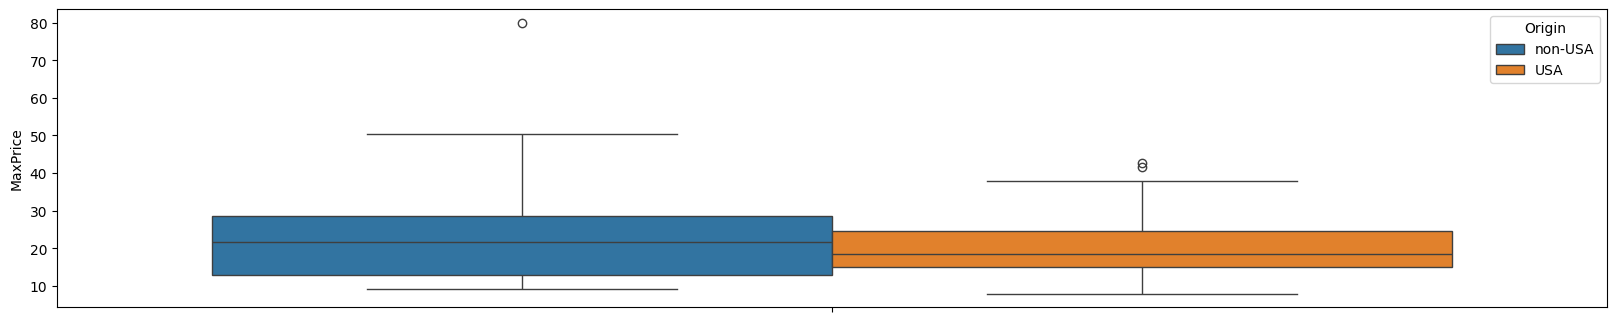

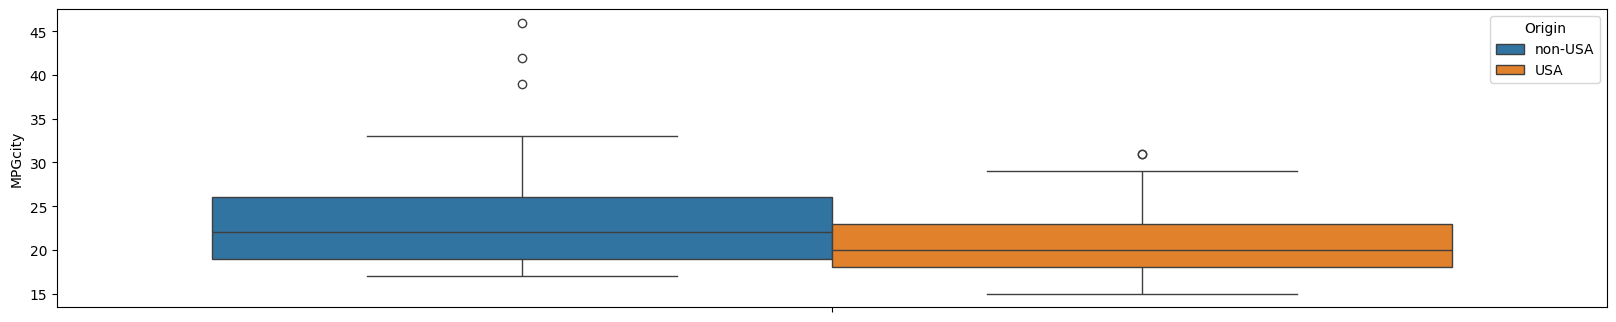

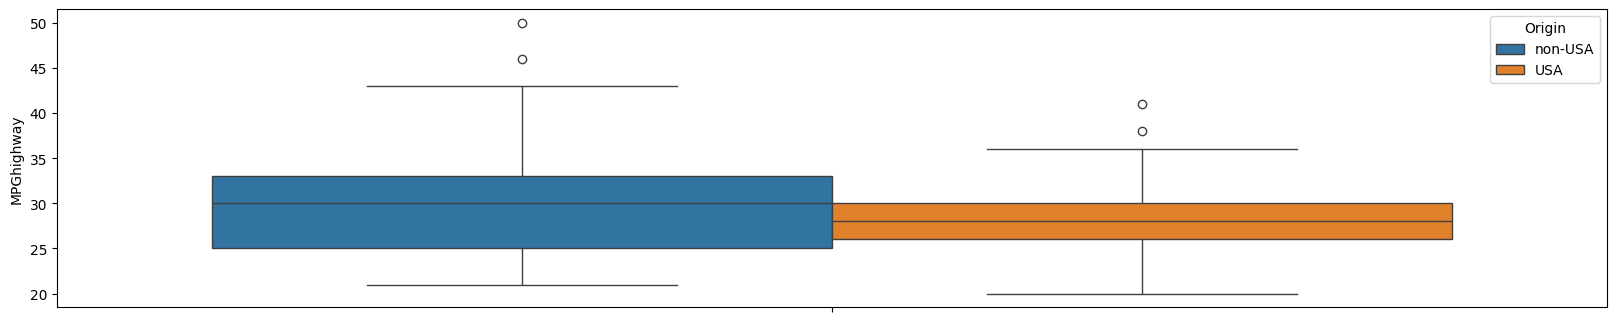

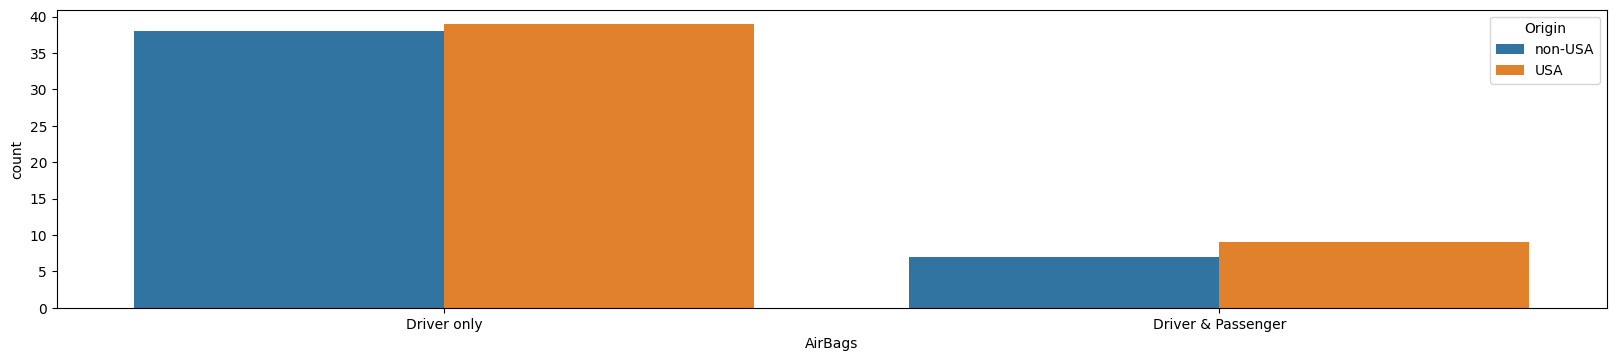

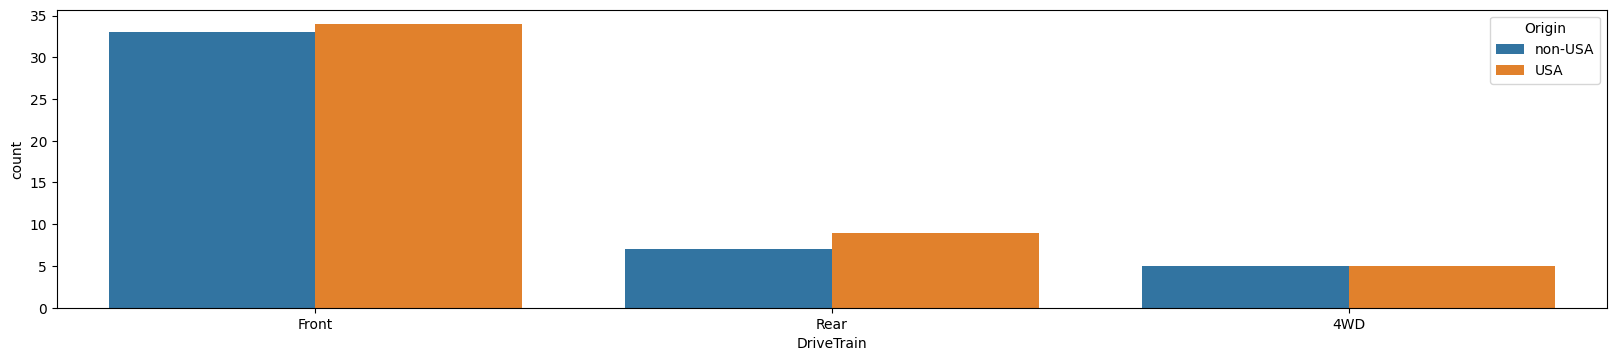

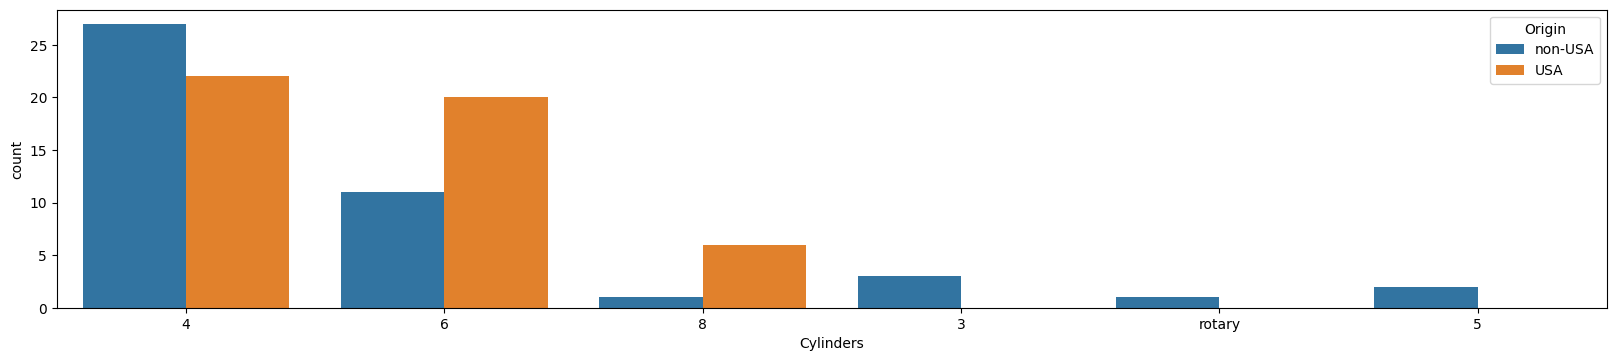

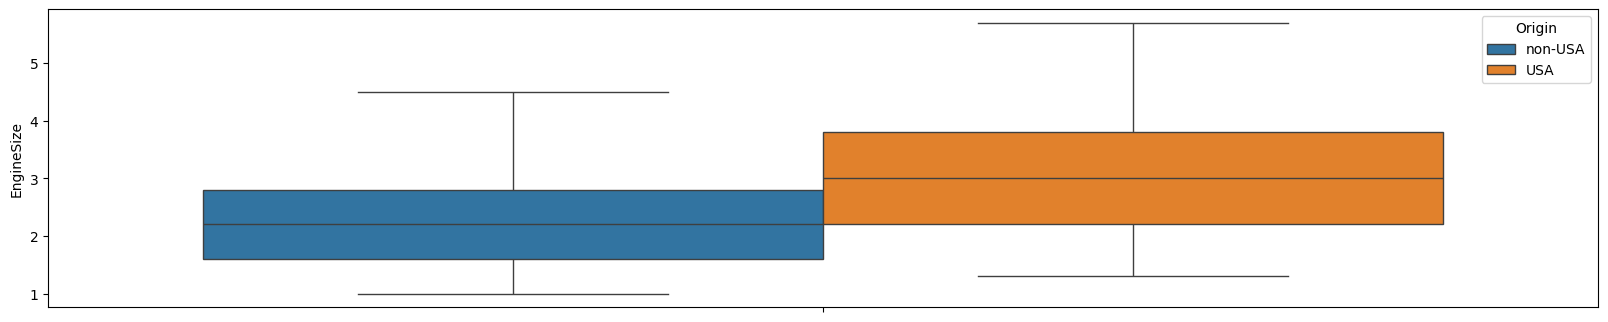

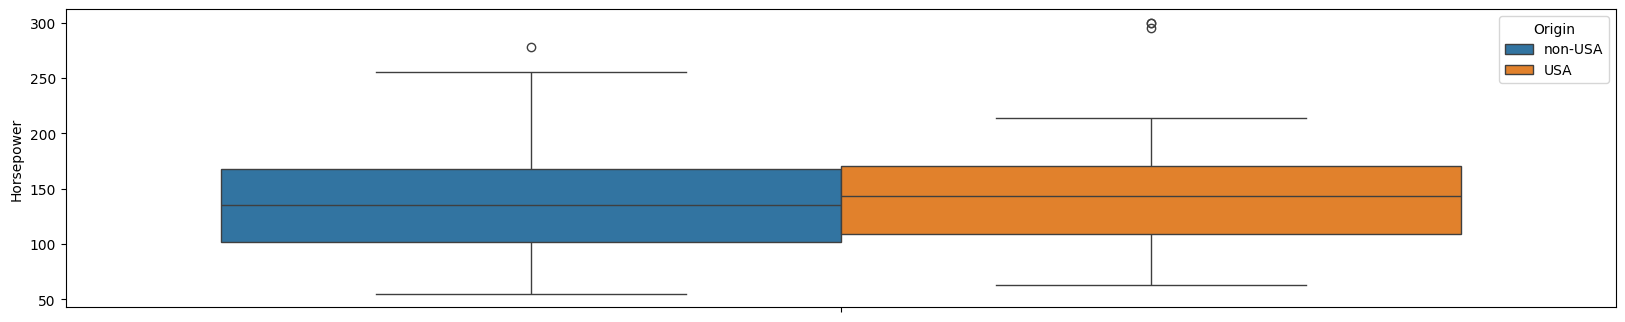

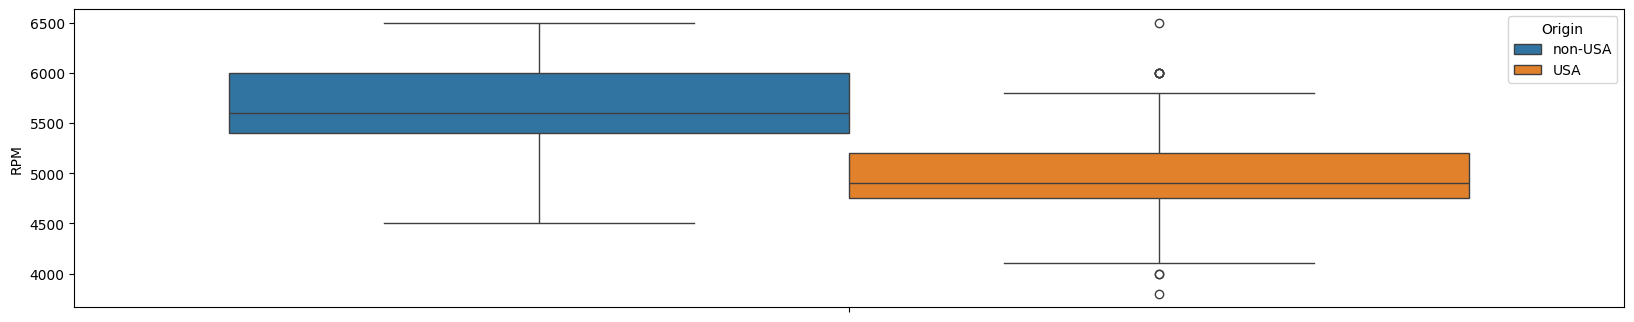

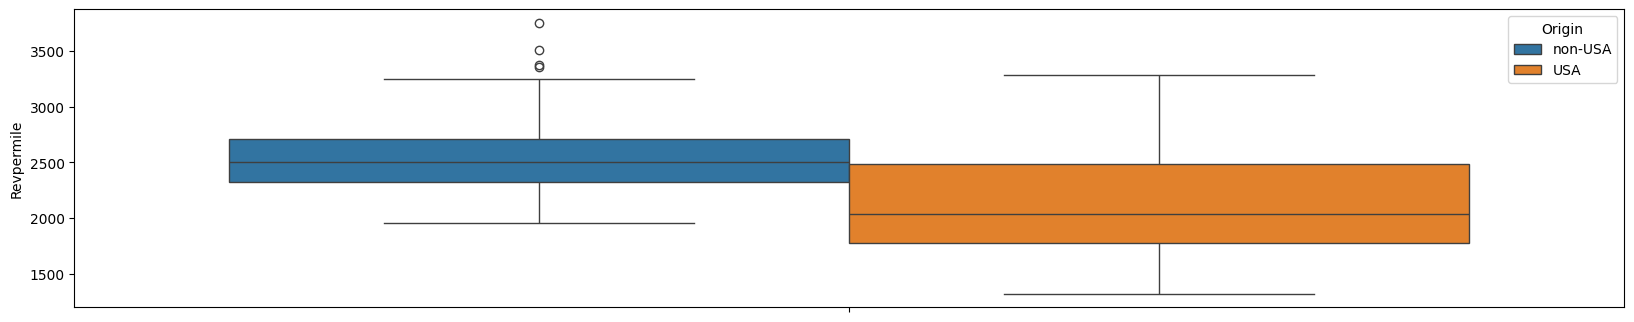

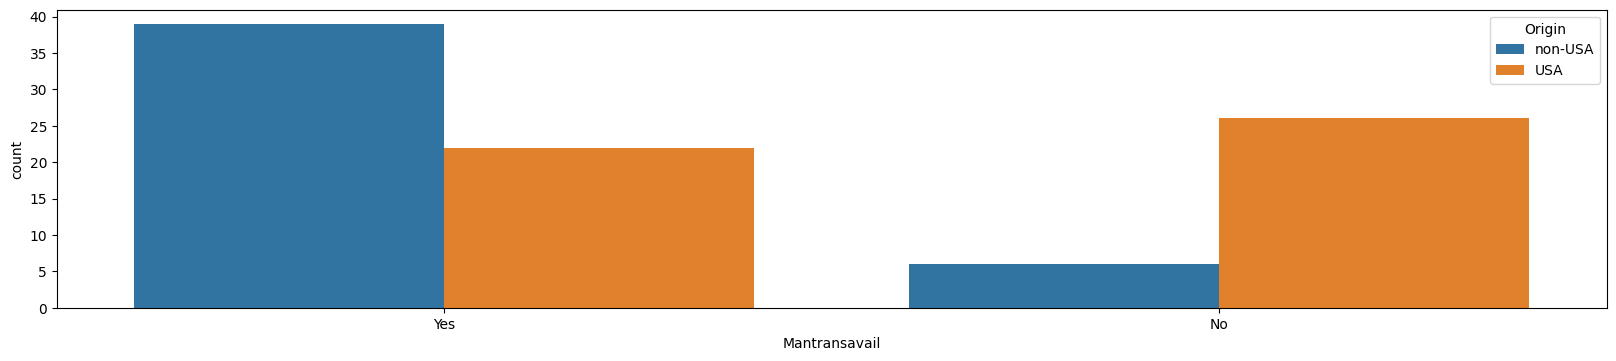

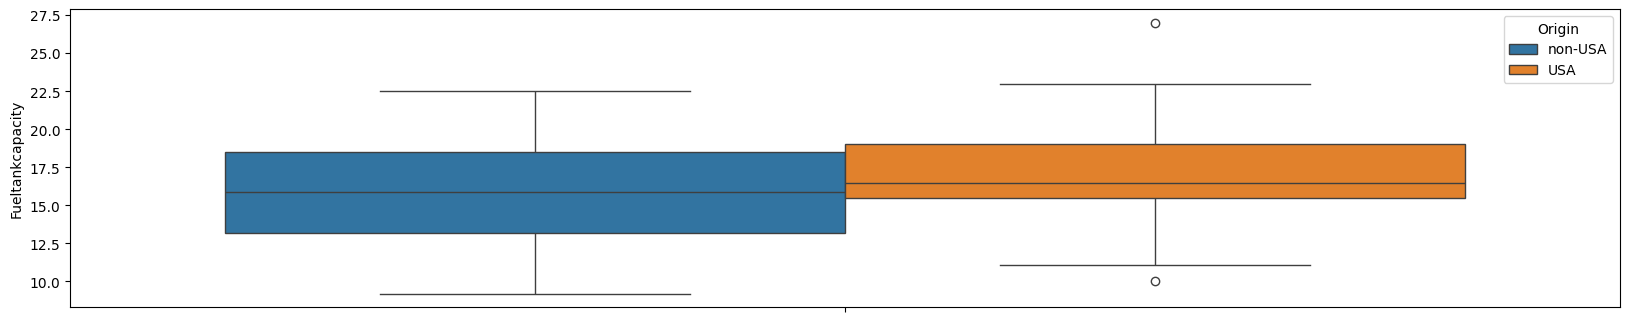

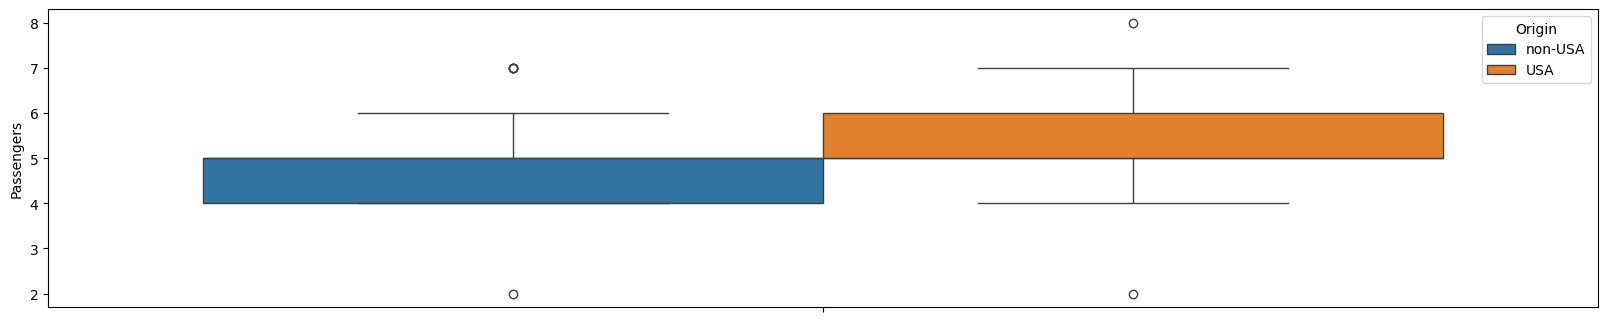

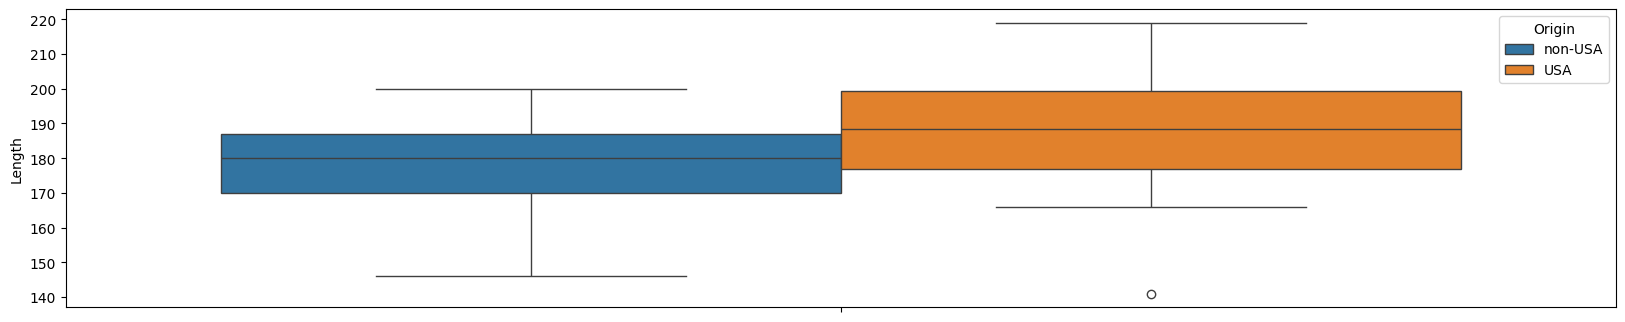

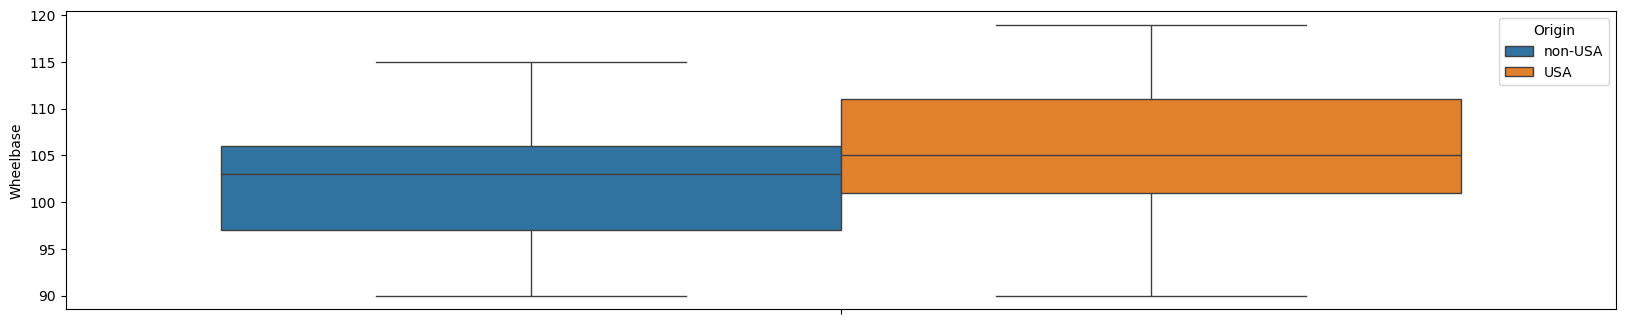

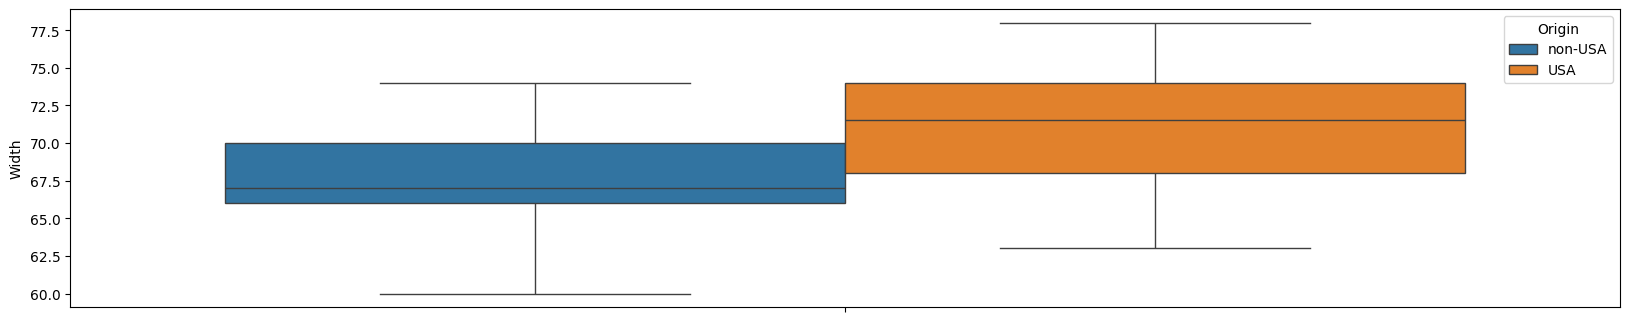

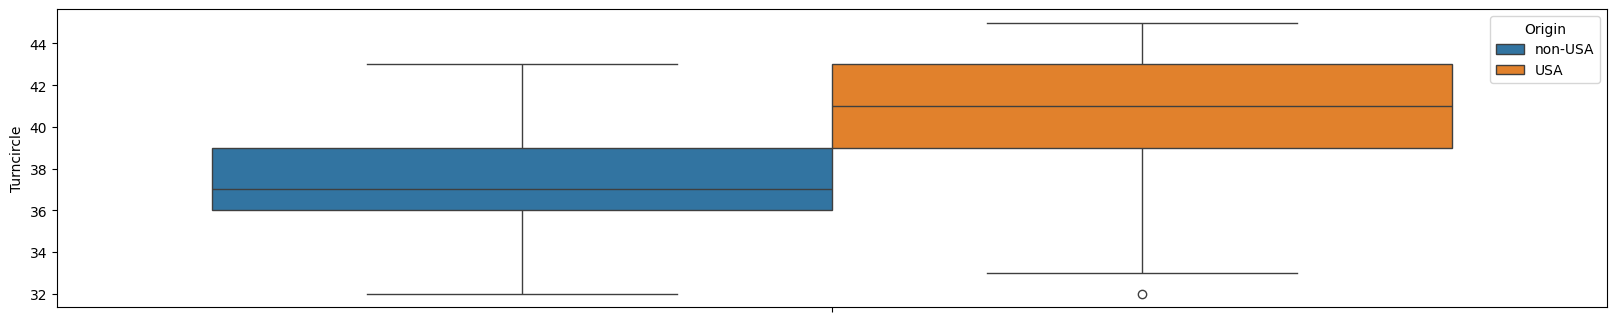

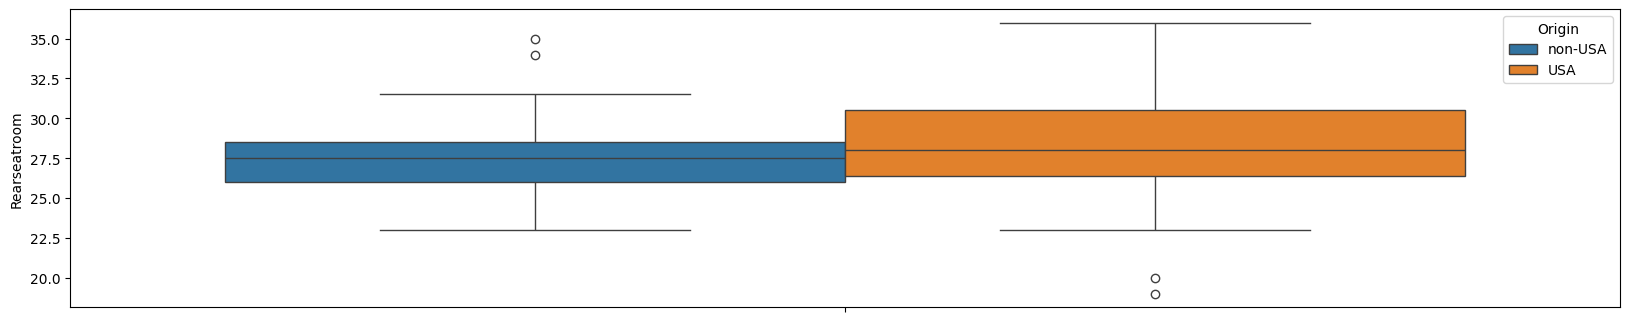

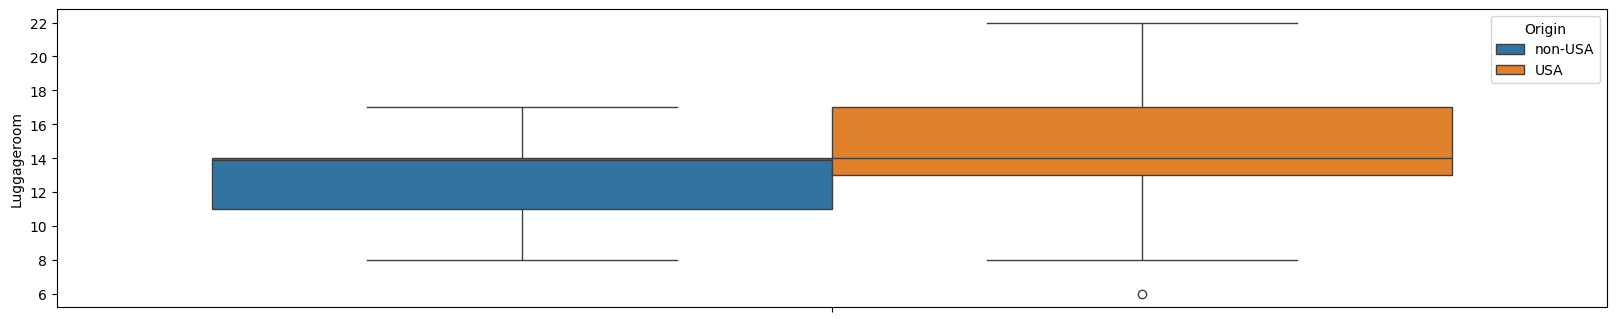

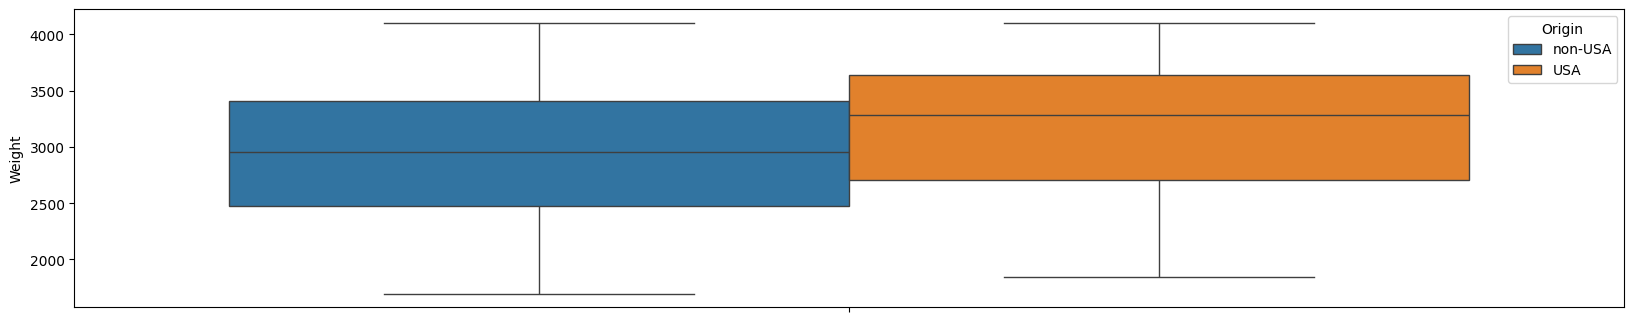

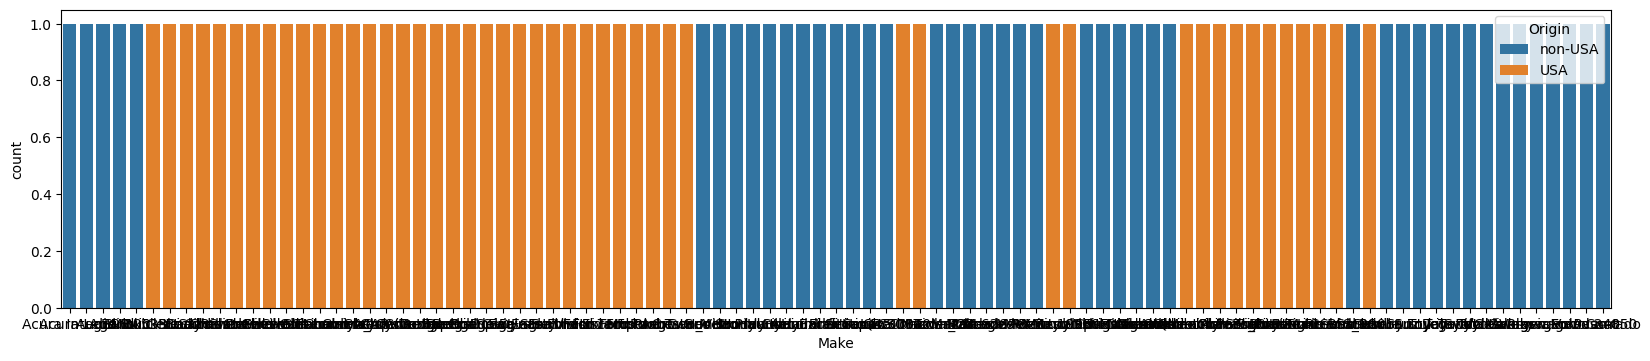

In [14]:
x=1
import matplotlib.pyplot as plt
import seaborn as sns
for i in X.columns:
    plt.figure(figsize=(20,120))
    if X[i].dtypes=='object':
        plt.subplot(26,1,x)
        x=x+1
        sns.countplot(x=X[i],hue=Y.Origin)
        plt.show()
    else:
        plt.subplot(26,1,x)
        x=x+1
        sns.boxplot(hue=Y.Origin,y=X[i])
        plt.show()   

## Used ANOVA and discarded columns on the basis of P value

In [15]:
def ANOVA(df,cat,con):
    from pandas import DataFrame
    from statsmodels.api import OLS
    from statsmodels.formula.api import ols
    rel=con+'~'+cat
    model=ols(rel,df).fit()
    from statsmodels.stats.anova import anova_lm
    anovaresults=anova_lm(model)
    Q=DataFrame(anovaresults)
    a=Q["PR(>F)"][cat]
    return round(a,3)

In [16]:
#create list named IMPORTANT COLUMNS
imp_col=[]
for i in X.columns:
    if(X[i].dtypes!='object'):
        x=ANOVA(df,'Origin',i)
        if(x<0.05):
            print('origin vs ',i,'--> ',x)
            imp_col.append(i)

origin vs  MPGcity -->  0.012
origin vs  EngineSize -->  0.0
origin vs  RPM -->  0.0
origin vs  Revpermile -->  0.0
origin vs  Passengers -->  0.017
origin vs  Length -->  0.0
origin vs  Wheelbase -->  0.008
origin vs  Width -->  0.0
origin vs  Turncircle -->  0.0
origin vs  Luggageroom -->  0.002
origin vs  Weight -->  0.038


In [17]:
imp_col

['MPGcity',
 'EngineSize',
 'RPM',
 'Revpermile',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turncircle',
 'Luggageroom',
 'Weight']

## Feature Selection For Catogarical Columns and Used Chi Square

In [18]:
from scipy.stats import chi2_contingency
def chisquare(df,cat1,cat2):
    import pandas as pd
    ct = pd.crosstab(df[cat1],df[cat2])
    a,b,c,d=chi2_contingency(ct)
    return b


In [19]:
for i in X.columns:
    if(X[i].dtypes=='object'):
        p=chisquare(df,'Origin',i)
        if(p<0.05):
            print("Origin vs ",i,'--> ',p)
            imp_col.append(i)

Origin vs  Manufacturer -->  4.122990295732623e-08
Origin vs  Type -->  0.015110051037674503
Origin vs  Cylinders -->  0.027311274054126932
Origin vs  Mantransavail -->  8.71164011659194e-05


In [20]:
imp_col

['MPGcity',
 'EngineSize',
 'RPM',
 'Revpermile',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turncircle',
 'Luggageroom',
 'Weight',
 'Manufacturer',
 'Type',
 'Cylinders',
 'Mantransavail']

### Preprocessing

In [21]:
cat=[]
con=[]
for i in imp_col:
    if X[i].dtypes=='object':
        cat.append(i)
    else:
        con.append(i)


In [22]:
cat

['Manufacturer', 'Type', 'Cylinders', 'Mantransavail']

In [23]:
X1=pd.get_dummies(X[cat])
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X2=pd.DataFrame(ss.fit_transform(X[con]),columns=con)
Xnew=X2.join(X1)
Xnew.head(20)

,MPGcity,EngineSize,RPM,Revpermile,Passengers,Length,Wheelbase,Width,Turncircle,Luggageroom,...,Type_Sporty,Type_Van,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Cylinders_rotary,Mantransavail_No,Mantransavail_Yes
0,0.471312,-0.841022,1.717489,1.129530,-0.083243,-0.427186,-0.286932,-0.366184,-0.610436,-1.033015,...,False,False,False,True,False,False,False,False,False,True
1,-0.781032,0.515869,0.369586,0.005661,-0.083243,0.812171,1.629649,0.431983,-0.298510,0.396643,...,False,False,False,False,False,True,False,False,False,True
2,-0.423219,0.128186,0.369586,-0.105713,-0.083243,-0.220626,-0.286932,-0.632239,-0.610436,0.039228,...,False,False,False,False,False,True,False,False,False,True
3,-0.602126,0.128186,0.369586,0.410659,0.884457,0.674465,0.302785,0.165927,-0.610436,1.111472,...,False,False,False,False,False,True,False,False,False,True
4,-0.065407,0.806631,0.706562,0.430909,-1.050944,0.192493,0.745073,-0.100128,0.013416,-0.318186,...,False,False,False,True,False,False,False,False,False,True
5,-0.065407,-0.453339,-0.135877,0.471409,0.884457,0.399052,0.155356,-0.100128,0.637268,0.754057,...,False,False,False,True,False,False,False,False,True,False
6,-0.602126,1.097393,-0.809828,-1.543455,0.884457,1.156437,1.039932,1.230149,0.949194,1.111472,...,False,False,False,False,False,True,False,False,True,False
7,-1.138845,2.938887,-2.157731,-2.049702,0.884457,2.258087,1.777079,2.294371,1.884972,2.541130,...,False,False,False,False,False,True,False,False,True,False
8,-0.602126,1.097393,-0.809828,-1.300456,-0.083243,1.018731,0.597644,0.964094,0.637268,0.039228,...,False,False,False,False,False,True,False,False,True,False
9,-1.138845,2.163521,-1.989243,-1.664954,0.884457,1.569556,1.482220,0.964094,1.261120,1.468886,...,False,False,False,False,False,False,True,False,True,False


## Split data into train and test set

In [24]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=23)

## Model training and Evaluation

In [25]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(xtrain,ytrain)
pred_tr=model.predict(xtrain)
pred_ts=model.predict(xtest)
from sklearn.metrics import accuracy_score,confusion_matrix

In [26]:
tr_err=accuracy_score(pred_tr,ytrain)
ts_err=accuracy_score(pred_ts,ytest)

In [27]:
tr_err

0.972972972972973

In [28]:
ts_err

0.8947368421052632